In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
from sklearn.metrics import accuracy_score

In [3]:
# df : dfframe c'est l'ensemble du jeu des données
df = pd.read_csv('diabetes.csv', sep=",")

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


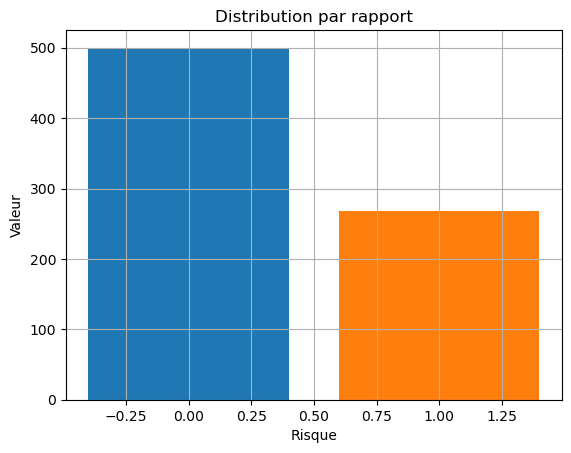

In [10]:
Classifier= df['Outcome'].value_counts()
for i , y in Classifier.items():
    plt.bar(x=i,height=y)
    plt.title('Distribution par rapport')
    plt.xlabel("Risque")
    plt.ylabel("Valeur")
    plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


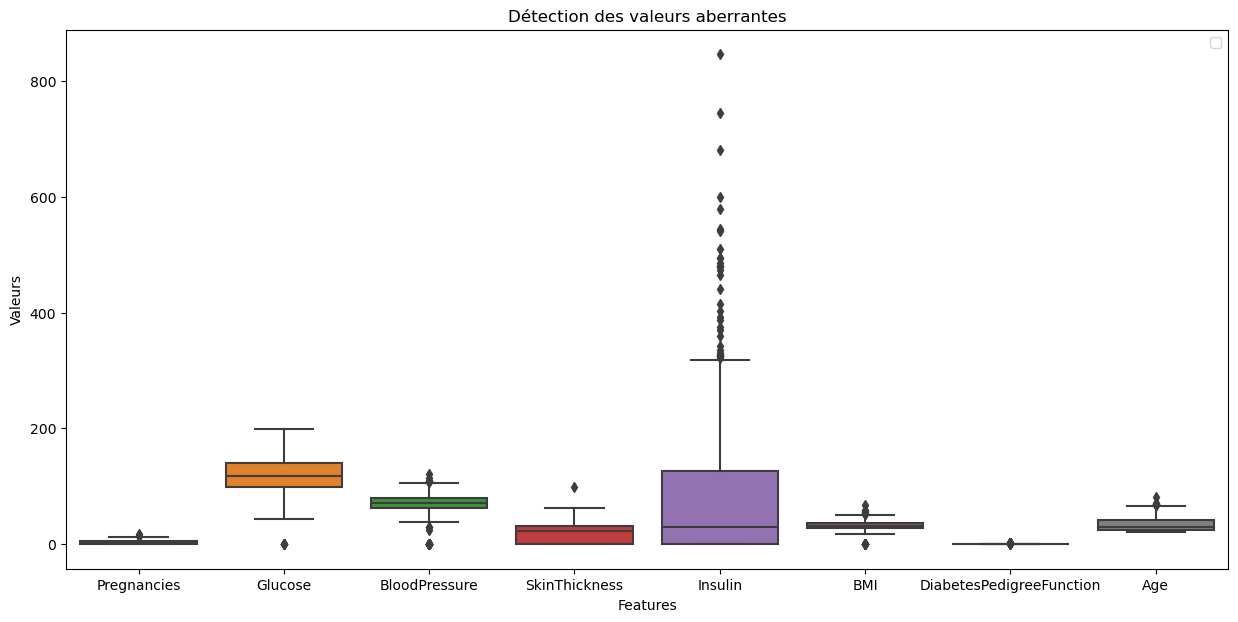

In [19]:
plt.figure(figsize=(15,7))
sn.boxplot(df.iloc[:,:-1])
plt.title("Détection des valeurs aberrantes")
plt.xlabel('Features')
plt.ylabel('Valeurs')
plt.legend() 
plt.show()

In [22]:
# risk= ["Pas de diabète", "Diabète"]
# for  label in df.columns[:-1]:
#     plt.hist(df[df['Outcome']== risk[0]][label], label=risk[0], color='green', histtype='bar', alpha=0.7, density=True)
#     plt.hist(df[df['Outcome']== risk[1]][label], label=risk[1],color='red', histtype='bar', alpha=0.7, density=True)
#     plt.title(f'distributtion Par {label}')
#     plt.xlabel(label)
#     plt.ylabel('Observation')
#     plt.legend()
#     plt.show()

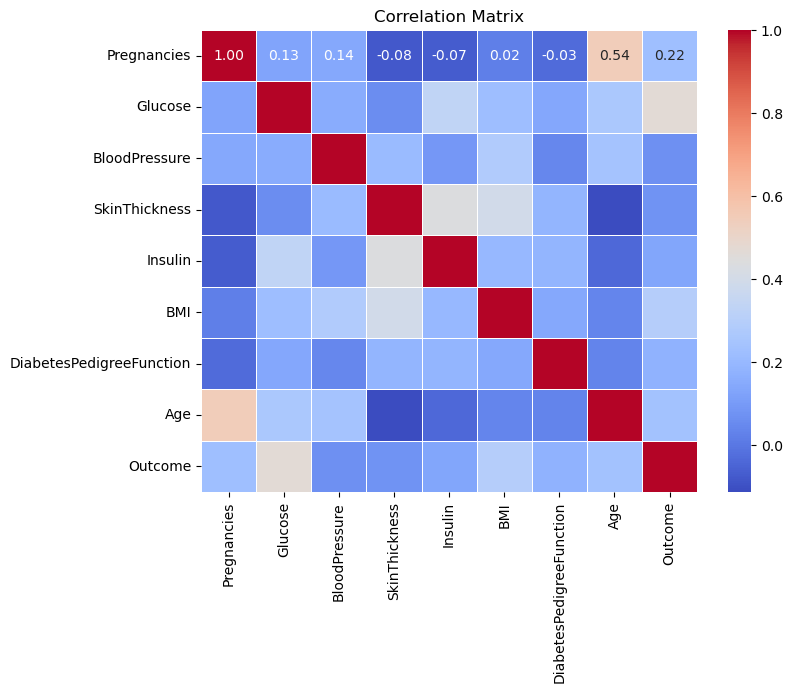

In [24]:
correlation_matrix = df.select_dtypes(include='number').corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [25]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw , uw

In [26]:
for i in df.select_dtypes(include="number").columns:
    lw , uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw , df[i])
    df[i] = np.where(df[i] > uw, uw , df[i])

In [29]:
x = df.drop(columns='Outcome') #features
y= df['Outcome'] #target

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)  
# 80% => données d'entrainements
#20% => données de tests

In [31]:
Svm_model = SVC()

In [32]:
Svm_model.fit(x_train,y_train)

SVC()

In [33]:
y_pred_svm=Svm_model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred_svm)

0.7922077922077922

In [37]:
Lr_model = LogisticRegression(max_iter=200)
Lr_model.fit(x_train,y_train)
y_pred_Lr=Lr_model.predict(x_test)
accuracy_score(y_test,y_pred_Lr)

0.8181818181818182

In [38]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(x_train,y_train)
y_pred_knn = Knn_model.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7597402597402597